In [11]:
import numpy as np
import matplotlib.pyplot as plt
import thomsonpy.data_management.formatter as fmt
import thomsonpy.config.paths as paths
import thomsonpy.config.solar_imager_params as sip
import thomsonpy.constants.units as units

In [12]:
model148_8 = fmt.load(f"../../{paths.MODELS_PATH}predsci_q1_148p_8steps.np")
model148_16 = fmt.load(f"../../{paths.MODELS_PATH}predsci_q1_148p_16steps.np")
model739_16 = fmt.load(f"../../{paths.MODELS_PATH}predsci_q1_739p_16steps.np")
model84 = fmt.load(f"../../{paths.MODELS_PATH}allsun_6x6Rsol_84p_16s.np")
model550 = fmt.load(f"../../{paths.MODELS_PATH}allsun_6x6Rsol_550p_16s.np")

C:\Users\alvaz\AppData\Local\Temp\ipykernel_10676\2036015979.py:5: RuntimeWarning: divide by zero encountered in log
  model_log = np.log(m)# / np.log(4)


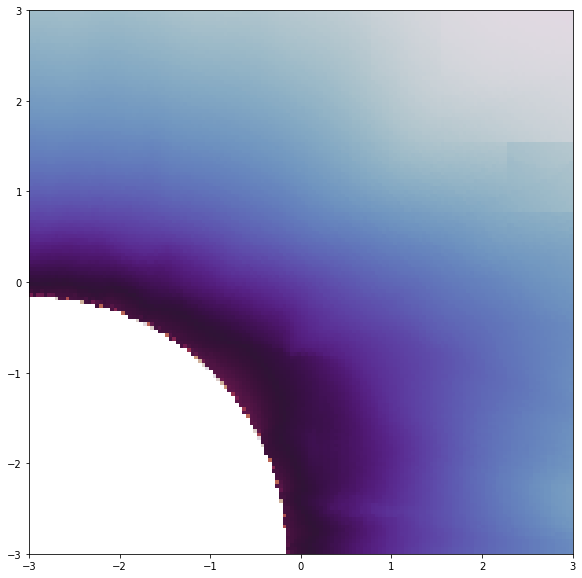

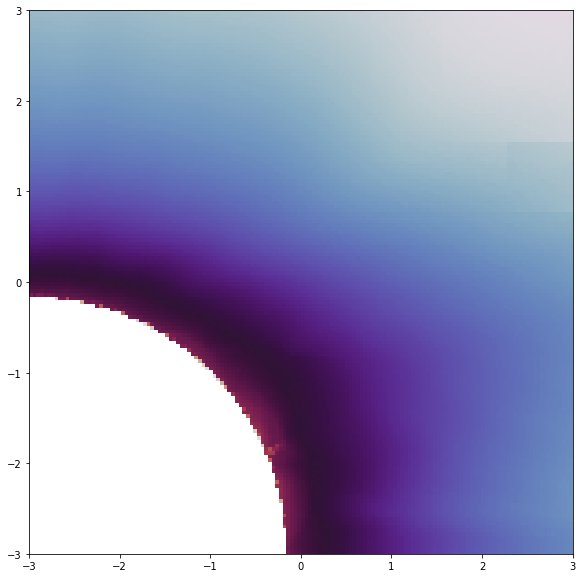

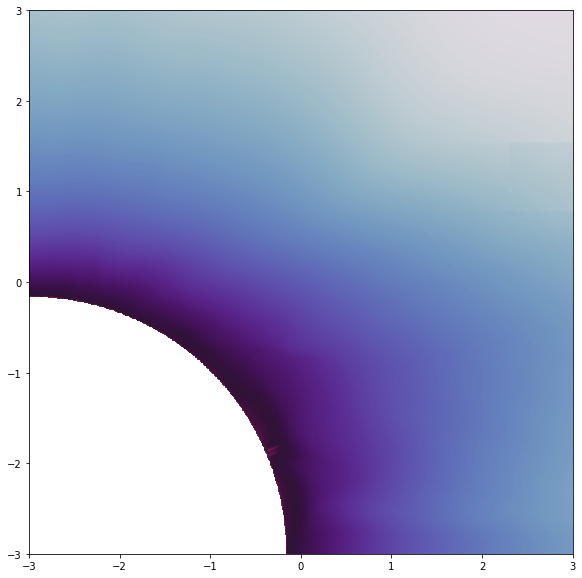

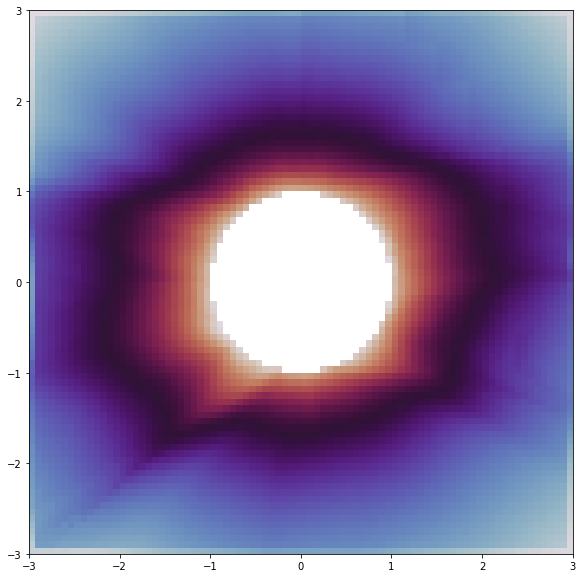

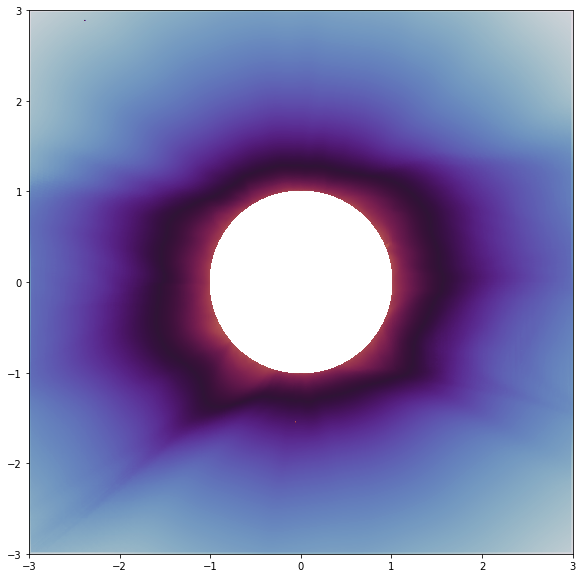

In [9]:
models = [model148_8, model148_16, model739_16, model84, model550]
for m in models:
    #plt.figure(figsize=(5.50, 5.50), dpi=100)
    plt.figure(figsize=(10, 10))
    model_log = np.log(m)# / np.log(4) 
    plt.imshow(model_log, 
               cmap = 'twilight', 
               interpolation = 'antialiased',
               interpolation_stage = 'data',
               #vmin = -25, 
               #vmax = -20,
               extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
#plt.savefig('myfig.png', dpi=100)

In [13]:
from PIL import Image 
import matplotlib.pyplot as plt 
from matplotlib import cm

model=fmt.load(f"../../{paths.MODELS_PATH}allsun_550p_16s_7600km.np")
img_array=model/np.max(model)
#img_array = np.log(img_array)
image = Image.fromarray(np.uint8(cm.gist_earth(img_array)*255))
image.save(f"../../{paths.MODELS_PATH}allsun_550p_16s_7600km.png")
image.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/projects/all-sun/models/allsun_550p_16s_7600km.np'

In [15]:
"""
Models comparison
"""
def imshow_model(model, description, ax, fig, **kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
                                  
    im = ax.imshow(model, **kwargs)

    ax.set_xlabel(f" X [RSol]") # Set the axis label in the form "Variable description [units]"
    ax.set_ylabel(f" Y [RSol]") # Set the axis label in the form "Variable description [units]"
    ax.set_title(description)

    #ax.legend()
    fig.colorbar(im, cax = cax, orientation = 'vertical')

C:\Users\alvaz\AppData\Local\Temp\ipykernel_1684\2148545105.py:6: RuntimeWarning: divide by zero encountered in log
  my_models = [np.divide(np.log(i), np.log(10)) for i in my_models]


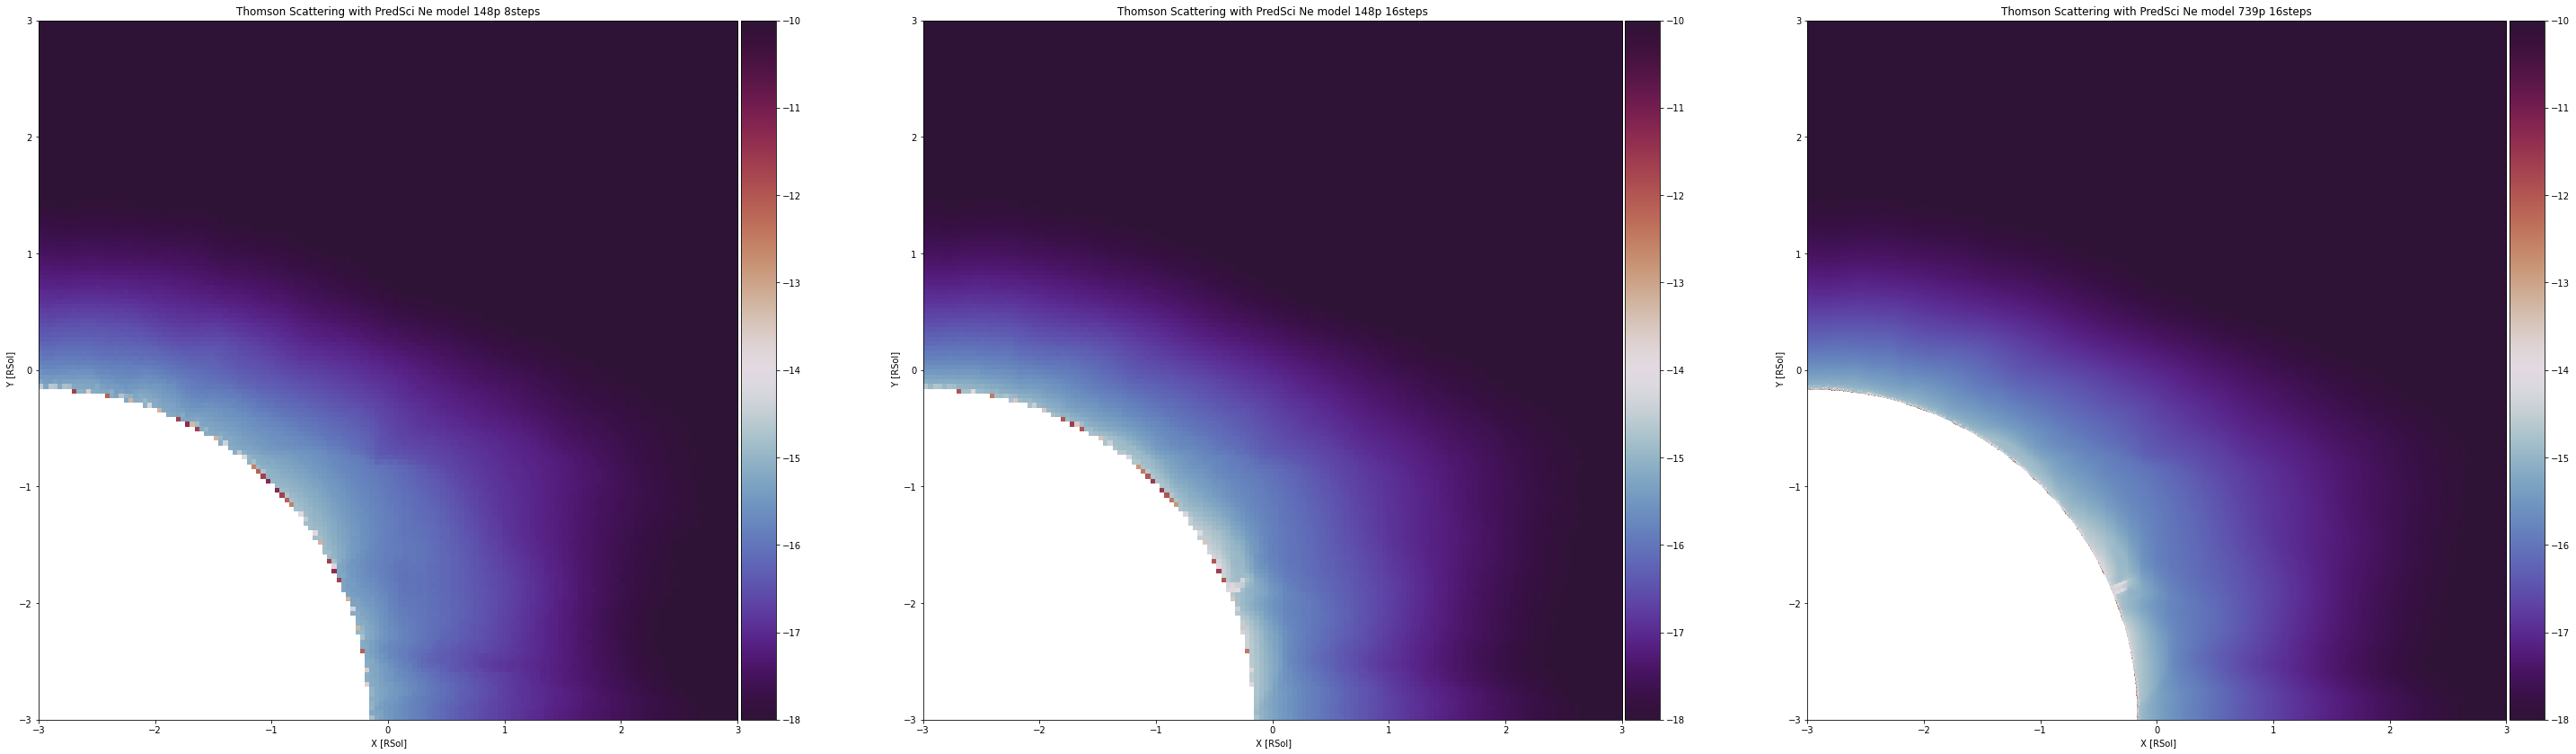

In [16]:
desc1 = "Thomson Scattering with PredSci Ne model 148p 8steps"
desc2 = "Thomson Scattering with PredSci Ne model 148p 16steps"
desc3 = "Thomson Scattering with PredSci Ne model 739p 16steps"

my_models = [model148_8, model148_16, model739_16]
my_models = [np.divide(np.log(i), np.log(10)) for i in my_models] 
my_desc = [desc1, desc2, desc3]
my_cmap = 'twilight_shifted'
my_interp = 'antialiased'
my_interp_stage = 'data'
my_vmin = -18
my_vmax = -10
my_extent = [sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL]

fig, ax = plt.subplots(ncols=3, figsize=(50, 40))   # We can select ncols, nrows, or both.

for i in range(3):
    imshow_model(my_models[i], my_desc[i], ax[i], fig, cmap = my_cmap, interpolation = my_interp, vmin = my_vmin, vmax = my_vmax, interpolation_stage = my_interp_stage, extent = my_extent)

In [17]:
fig.savefig(f"../../{paths.MODELS_PATH}predsci_comparison.jpg")

C:\Users\alvaz\AppData\Local\Temp\ipykernel_1684\2970306099.py:27: RuntimeWarning: divide by zero encountered in log
  model_log = np.divide(np.log(model), np.log(10))


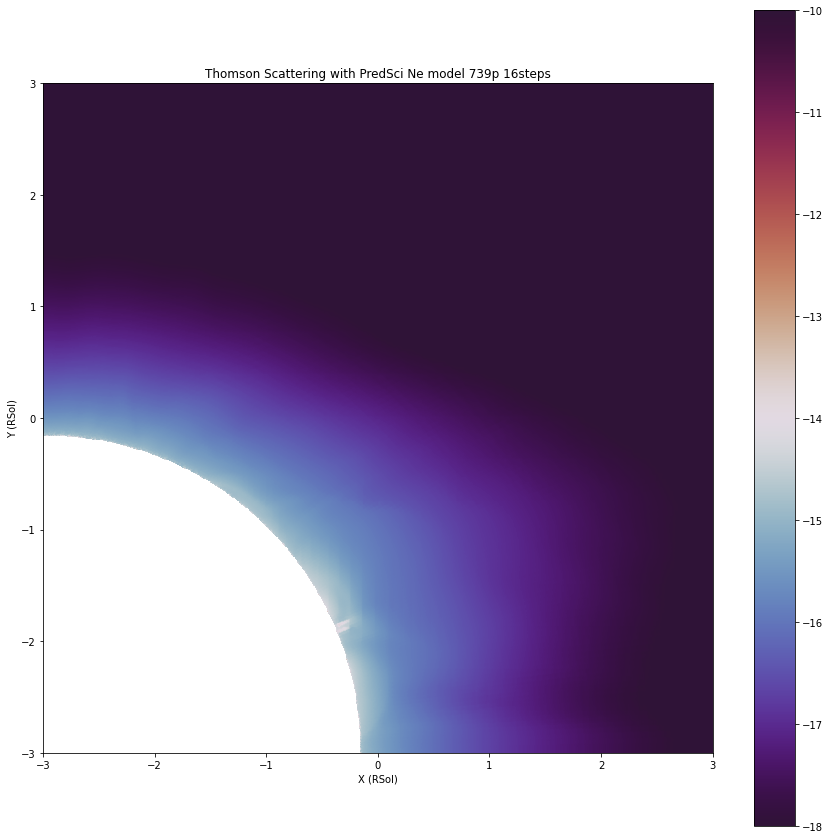

In [28]:
"""
Visualization of the ThomsonScattering.
"""
"""
cmap
['rainbow', 'nipy_spectral', 'gist_ncar', 'viridis', 'twilight', 'twilight_shifted', 'bone']
"""

"""
interpolation
'none', 'antialiased', 'nearest', 'bilinear', 
'bicubic', 'spline16', 'spline36', 'hanning', 
'hamming', 'hermite', 'kaiser', 'quadric', 
'catrom', 'gaussian', 'bessel', 'mitchell', 
'sinc', 'lanczos', 'blackman'

"""

"""
interpolation_stage{'data', 'rgba'}, default: 'data'
"""
model = model739_16
plt.figure(figsize=(15, 15))
plt.title("Thomson Scattering with PredSci Ne model 739p 16steps")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
model_log = np.divide(np.log(model), np.log(10))
plt.imshow(model_log, 
           cmap = 'twilight_shifted', 
           interpolation = 'gaussian',
           interpolation_stage = 'data',
           vmin = -18, 
           vmax = -10,
           extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()
plt.savefig(f"../../{paths.MODELS_PATH}allsun_550p_16s_7600km.jpg")